In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
li = []
df = pd.read_csv("/content/SC4002E0-PSG.edf.csv")
li.append(df)
df = pd.read_csv("/content/SC4002E0-PSG.edf.csv")
li.append(df)
df = pd.read_csv("/content/SC4011E0-PSG.edf.csv")
li.append(df)
df = pd.read_csv("/content/SC4012E0-PSG.edf.csv")
li.append(df)
df = pd.read_csv("/content/SC4021E0-PSG.edf.csv")
li.append(df)
df = pd.read_csv("/content/SC4022E0-PSG.edf.csv")
li.append(df)
df = pd.read_csv("/content/SC4031E0-PSG.edf.csv")
li.append(df)
df = pd.read_csv("/content/SC4032E0-PSG.edf.csv")
li.append(df)
df = pd.read_csv("/content/SC4041E0-PSG.edf.csv")
li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)


In [3]:
print(df.isnull().sum())

average_amplitude_change    0
variance                    0
std                         0
sum_square_root             0
crest_factor                0
skew                        0
kurtosis                    0
stage                       0
dtype: int64


In [4]:
df.describe()

average_amplitude_change     variance  ...     kurtosis        stage
count               9675.000000  9675.000000  ...  9675.000000  9675.000000
mean                   0.000035   390.866668  ...     1.641735     2.103049
std                    0.009100   456.548054  ...     2.022174     1.226822
min                   -0.050712    18.557636  ...    -0.773479     0.000000
25%                   -0.004218   116.722485  ...     0.331937     2.000000
50%                    0.000033   217.757250  ...     0.990548     2.000000
75%                    0.004449   460.375630  ...     2.298805     3.000000
max                    0.073192  6170.379400  ...    26.240711     4.000000

[8 rows x 8 columns]

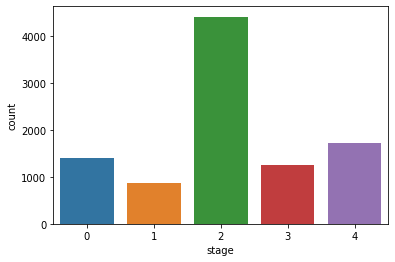

In [5]:
sns.countplot(x="stage", data=df)

In [6]:
tagert_encoding = df['stage']

In [7]:
df2 = df.drop('stage',axis=1)

In [8]:
#!pip install category_encoders
#import category_encoders as ce
#column4=df2.columns
#encoder4 = ce.TargetEncoder(cols=[x for x in column4])
#target_encoding=np.array(tagert_encoding)
#target_encoder_all= encoder4.fit_transform(df2,target_encoding)

In [9]:
one_hot_r=pd.get_dummies(df2, prefix_sep='_', drop_first=False)
target5=np.array(one_hot_r)
X = df2
y = np.array(tagert_encoding)
print(X.shape,y.shape)

(9675, 7) (9675,)


In [10]:
#from sklearn.preprocessing import RobustScaler
#transformer = RobustScaler().fit(X)
#X = transformer.transform(X)

In [11]:
#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(X)
#cumsum = np.cumsum(pca.explained_variance_ratio_)
#d = np.argmax(cumsum >= 0.99999) + 1
#print(d)

In [12]:
#pca = PCA(n_components=d)
#X = pca.fit_transform(X)

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)
print(X_ros.shape, y_ros.shape)

(22100, 7) (22100,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [18]:
X_sm1, y_sm1 =pd.DataFrame(X_sm), pd.DataFrame (y_sm)
X_rus1, y_rus1 =pd.DataFrame(X_resampled), pd.DataFrame (y_resampled)  
X_tl1, y_tl1  =pd.DataFrame(X_tl), pd.DataFrame (y_tl)
X_ros1, y_ros1  =pd.DataFrame(X_ros), pd.DataFrame (y_ros) 

In [19]:
df5 = pd.concat([X_sm1,X_tl1])
print(df5.shape)
target5 = pd.concat([y_sm1,y_tl1])
print(target5.shape)

(22312, 7)
(22312, 1)


In [20]:
pd.DataFrame(y_rus1).value_counts()

4    869
3    869
2    869
1    869
0    869
dtype: int64

In [21]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
target_combined = enc.fit_transform(target5).toarray()
print(target_combined.shape)

(22312, 5)


In [22]:
target_combined1=pd.get_dummies(y_rus1, prefix_sep='_', drop_first=False)
target_combined1 = np.array(target_combined1)
df6 = np.array(df5) 
print(target_combined1.shape)

(4345, 1)


In [23]:
print(df5.shape)
print(target_combined.shape)

(22312, 7)
(22312, 5)


In [24]:
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set,target_train,target_test = train_test_split(np.array(df5),np.array(target5), test_size=0.3,random_state=21)
#train_set, test_set,target_train,target_test = train_test_split(X_cc, y_cc, test_size=0.3,random_state=0)
print(target_train.shape,target_test.shape)
print(test_set.shape)
print(train_set.shape)

(15618, 1) (6694, 1)
(6694, 7)
(15618, 7)


In [26]:
from xgboost import XGBClassifier

In [27]:
from sklearn.metrics import accuracy_score
model=XGBClassifier(n_estimators=41,max_depth=110,learning_rate=0.7)
model.fit(train_set, target_train)
y_pred_trainsm_rnd = model.predict(train_set)
y_predsm_rnd = model.predict(test_set)
accuracy_trainsm = accuracy_score(target_train, y_pred_trainsm_rnd)
accuracysm = accuracy_score(target_test, y_predsm_rnd)
print("Accuracysm of random_forest: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm of random_forest: %.2f%%" % (accuracy_trainsm * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracysm of random_forest: 89.15%
Accuracy trainsm of random_forest: 100.00%


In [28]:
!pip install scikit-plot

In [29]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [30]:
probas = model.predict_proba(test_set)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


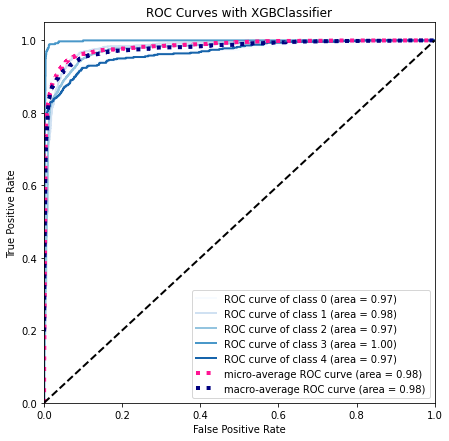

In [31]:
skplt.metrics.plot_roc_curve(target_test,probas,title="ROC Curves with XGBClassifier", cmap='Blues', figsize=[7,7])
plt.show()

In [32]:
pred = model.predict(test_set)

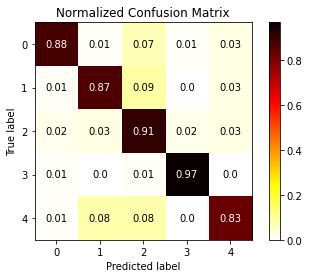

In [33]:
skplt.metrics.plot_confusion_matrix(target_test,pred, normalize=True, cmap='hot_r')
plt.show()

In [34]:
df5 = pd.concat([X_rus1,X_tl1])
print(df5.shape)
target5 = pd.concat([y_rus1,y_tl1])
print(target5.shape)

(13431, 7)
(13431, 1)


In [35]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
target_combined = enc.fit_transform(target5).toarray()
print(target_combined.shape)

(13431, 5)


In [36]:
from sklearn.model_selection import train_test_split
train_set, test_set,target_train,target_test = train_test_split(np.array(df5),np.array(target_combined), test_size=0.3,random_state=21)
#train_set, test_set,target_train,target_test = train_test_split(X_cc, y_cc, test_size=0.3,random_state=0)
print(target_train.shape,target_test.shape)
print(test_set.shape)
print(train_set.shape)

(9401, 5) (4030, 5)
(4030, 7)
(9401, 7)


In [37]:
train_data=train_set[0:int(train_set.shape[0]*0.8)]
valid_data=train_set[int(train_set.shape[0]*0.8):]
train_target=target_train[0:int(train_set.shape[0]*0.8)]
valid_target=target_train[int(train_set.shape[0]*0.8):]

In [38]:
train_data= train_data.astype('float64')
valid_data = valid_data.astype('float64')
train_target = train_target.astype('float64')
valid_target = valid_target.astype('float64')

In [39]:
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import nn
from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense, Dropout,Conv1D,MaxPooling1D,Activation,Flatten,AveragePooling1D,GlobalMaxPooling1D,ZeroPadding1D, BatchNormalization, GlobalAveragePooling1D
from tensorflow.python.keras.models import Sequential
from tensorflow import keras
from keras import layers

In [40]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [41]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [42]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [43]:
train_data= train_data.astype('float32')
valid_data = valid_data.astype('float32')
train_target = train_target.astype('float32')
valid_target = valid_target.astype('float32')

In [44]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [45]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [46]:
train_data= train_data.astype('float32')
valid_data = valid_data.astype('float32')
train_target = train_target.astype('float32')
valid_target = valid_target.astype('float32')

In [47]:
import tensorflow as tf
early_stopping_cb =  tf.keras.callbacks.EarlyStopping(patience=100000,
restore_best_weights=True)
lr_scheduler1 = tf.keras.callbacks.ReduceLROnPlateau(factor=0.333, patience=10000)


In [48]:
import tensorflow as tf
import os,datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [49]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [50]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [51]:
model1 = Sequential()
model1.add(layer=Conv1D(filters=34, kernel_size=13, activation='tanh',data_format='channels_last',padding='same'))
model1.add(layer=Conv1D(filters=66, kernel_size=5, activation='swish',data_format='channels_last',padding='same'))
model1.add(layer=Conv1D(filters=1, kernel_size=5,strides=2, activation='swish',data_format='channels_last',padding='same'))
model1.add(layer=Dropout(rate=0.25))
model1.add(layer=Flatten())
model1.add(layer=Dense(units=100, activation='tanh'))
model1.add(layer= BatchNormalization())
model1.add(layer=Dropout(rate=0.25))
model1.add(layer=Dense(units=100, activation='tanh'))
model1.add(layer= BatchNormalization())
model1.add(layer=Dropout(rate=0.35))
model1.add(layer=Dense(units=5, activation='softmax'))

In [52]:
train_set=train_set.reshape(train_set.shape[0],train_set.shape[1],1)
test_set=test_set.reshape(test_set.shape[0],test_set.shape[1],1)

In [53]:
from tensorflow import keras
from tensorflow import keras
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[1, train_set.shape[1]]),
keras.layers.BatchNormalization(),
keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01)),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.20),
keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01)),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.20),
keras.layers.Dense(units=5,activation='softmax')])

In [54]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.1,beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [55]:
model.compile(optimizer='nadam', loss='categorical_crossentropy',metrics=['accuracy'])  
history = model.fit(x=train_set , y=target_train, batch_size=2048, epochs=100000, verbose=2,validation_split=0.2,callbacks=[lr_scheduler1, early_stopping_cb])

Streaming output truncated to the last 5000 lines.
Epoch 97501/100000
4/4 - 0s - loss: 0.3663 - accuracy: 0.8711 - val_loss: 0.9434 - val_accuracy: 0.7640
Epoch 97502/100000
4/4 - 0s - loss: 0.3734 - accuracy: 0.8770 - val_loss: 0.9437 - val_accuracy: 0.7645
Epoch 97503/100000
4/4 - 0s - loss: 0.3691 - accuracy: 0.8697 - val_loss: 0.9437 - val_accuracy: 0.7650
Epoch 97504/100000
4/4 - 0s - loss: 0.3770 - accuracy: 0.8637 - val_loss: 0.9439 - val_accuracy: 0.7650
Epoch 97505/100000
4/4 - 0s - loss: 0.3717 - accuracy: 0.8685 - val_loss: 0.9441 - val_accuracy: 0.7650
Epoch 97506/100000
4/4 - 0s - loss: 0.3735 - accuracy: 0.8669 - val_loss: 0.9441 - val_accuracy: 0.7650
Epoch 97507/100000
4/4 - 0s - loss: 0.3800 - accuracy: 0.8654 - val_loss: 0.9441 - val_accuracy: 0.7650
Epoch 97508/100000
4/4 - 0s - loss: 0.3756 - accuracy: 0.8731 - val_loss: 0.9442 - val_accuracy: 0.7656
Epoch 97509/100000
4/4 - 0s - loss: 0.3964 - accuracy: 0.8634 - val_loss: 0.9443 - val_accuracy: 0.7656
Epoch 97510/1

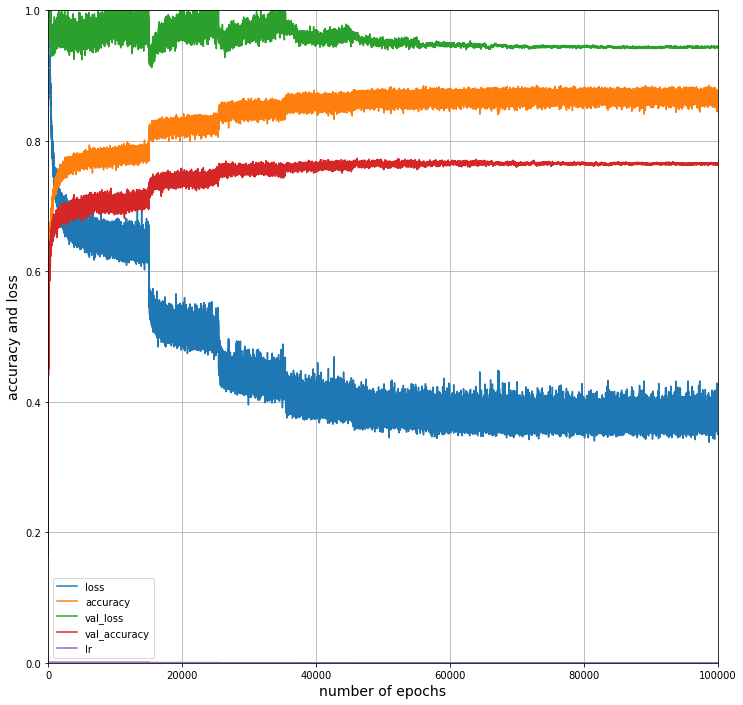

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 12))
plt.grid(True)
plt.gca().set_xlim(0, 100000)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel('number of epochs', fontsize=14)
plt.ylabel('accuracy and loss', fontsize=14)
plt.show()